# Geometric Transforms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as iread
import matplotlib.cm as cm
import math
import cv2

# Definition of Scaling

In [2]:
def scaling(img,t_x,t_y):
    h,w = img.shape
    target = np.zeros((h,w))  #declaring target array to store the image after scaling

    i = 2
    j = 7
    while i<h:
        j = 7
        while j<w:
            x_s = i/t_x
            y_s = j/t_y
            x_s_new = math.floor(x_s)
            y_s_new = math.floor(y_s)
            b = y_s - y_s_new
            a = x_s - x_s_new
            if(x_s_new<h-1 and y_s_new<w-1):
              #assigining target pixel intensity using bilinear interpolation
              target[i,j] = (1-a)*(1-b)*img[x_s_new,y_s_new] + (1-a)*(b)*img[x_s_new,y_s_new + 1] + (a)*(1-b)*img[x_s_new+1,y_s_new]+(a)*(b)*img[x_s_new + 1 , y_s_new + 1]
            j = j+1
        i = i+1
    return target

# Definition of Translation

In [3]:
def translation(img,t_x,t_y):
    h,w = img.shape
    target = np.zeros((h,w))  #declaring target array to store the image after translation
    i = 5
    j = 5
    while i<w:
        j = 5
        while j<h:
            x_s = i - t_x
            y_s = j - t_y
            x_s_new = math.floor(x_s)
            y_s_new = math.floor(y_s)
            b = y_s - y_s_new
            a = x_s - x_s_new
          #assigining target pixel intensity using bilinear interpolation
            target[i,j] = (1-a)*(1-b)*img[x_s_new,y_s_new] + (1-a)*(b)*img[x_s_new,y_s_new + 1] + (a)*(1-b)*img[x_s_new+1,y_s_new]+(a)*(b)*img[x_s_new + 1 , y_s_new + 1]
            j = j+1
        i = i+1
    return target

# Definition of Rotation

In [4]:
def rotation(img,angleINdegree):
    h,w = img.shape
    #Finding the center of image
    x_0 = math.floor(h/2) 
    y_0 = math.floor(w/2)
    
   #converting angle in Radian
    theta = math.radians(angleINdegree) #taking angle as 15 degree
    cosine = math.cos(theta)
    sine = math.sin(theta)
    
    #Initializing i and j which represents target coordinates
    target = np.zeros((h,w))  #declaring target array to store the image after translation
    i = 0
    j = 0
    
    while i<h:
        j = 0
        while j<w:
            #Moving the pixels w.r.t center
            x =   x_0 - i
            y =   y_0 - j 
           #  rotation 
            x_s = (cosine * x) - (sine * y) 
            y_s = (cosine * y)+(sine * x) 
            x_s =  x_0 - x_s
            y_s =  y_0 - y_s 
            x_s_new = math.floor(x_s) 
            y_s_new = math.floor(y_s) 
            a = x_s - x_s_new
            b = y_s - y_s_new
           #assigining target pixel intensity using bilinear interpolation
            if x_s_new>=0 and x_s_new<(h-1) and y_s_new>=0 and y_s_new<(w-1):
                target[i,j] = (1-a)*(1-b)*img[x_s_new,y_s_new] + (1-a)*(b)*img[x_s_new,y_s_new + 1] + (a)*(1-b)*img[x_s_new+1,y_s_new]+(a)*(b)*img[x_s_new + 1 , y_s_new + 1]
            j = j+1
        i = i+1
    return target

# Main Method to call every functions

In [5]:
def mainfun():
    #Give location of the image to be read
    img = iread.imread('/Users/rashmipathak/Desktop/ED6001 Assignments/EE20S051/00006727_004.png')
    #function call for various operation
    # value by which each pixel needs to be tranlated
    t_x = 5.5
    t_y = 4.4
    T1 = translation(img,t_x,t_y)
    
    #Value by which the pixel coordinates needs to be scaled
    
    scalingFactor_X = 0.4
    scalingFactor_Y = 1.4
    T2 = scaling(img,scalingFactor_X,scalingFactor_Y)
    T3 = rotation(img,35)
    
    # create figure
    fig = plt.figure(figsize=(20, 20))
    # setting values to rows and column variables
    rows = 2
    columns = 2
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 1)
    # showing image
    plt.imshow(img,cmap = cm.gray)
    plt.axis('off')
    plt.title("Original IMage")
    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 2)
    # showing image
    plt.imshow(T1,cmap = cm.gray)
    plt.axis('off')
    plt.title("Translated image")
    
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 3)
    # showing image
    plt.imshow(T2,cmap = cm.gray)
    plt.axis('off')
    plt.title("Scaled image")
    
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 4)
    # showing image
    plt.imshow(T3,cmap = cm.gray)
    plt.axis('off')
    plt.title("Rotated image")

# This line of code start the execution

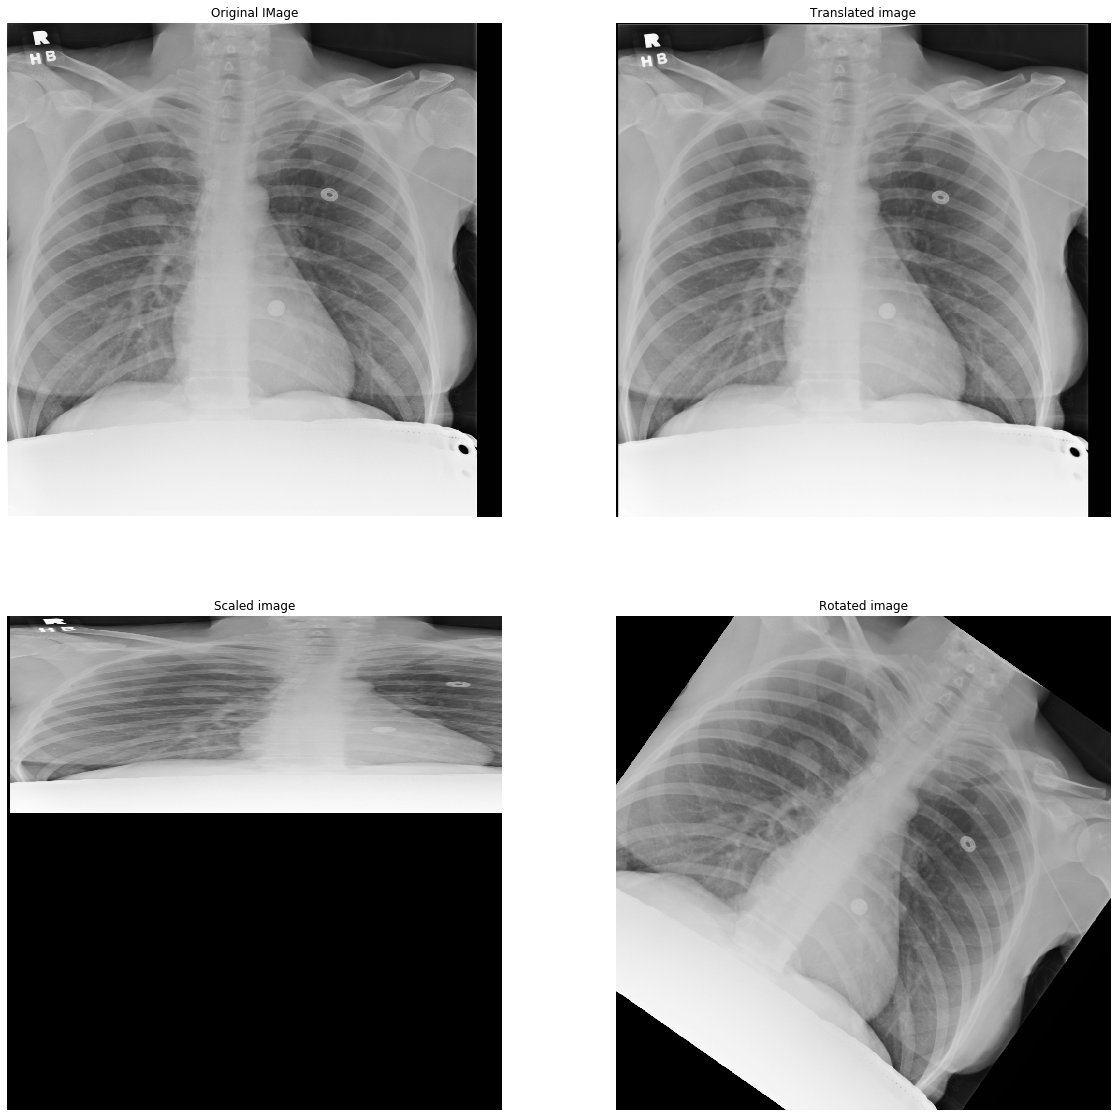

In [8]:
mainfun()

# My Observations: